## Collinear features and their effect on linear models

In [24]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('/home/ubuntu/drive_kodakandlasrikar99/aaic/task_d.csv')

In [26]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [27]:
features=list(data.columns)

In [28]:
features

['x', 'y', 'z', 'x*x', '2*y', '2*z+3*x*x', 'w', 'target']

In [29]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

<AxesSubplot:title={'center':'data correlation '}>

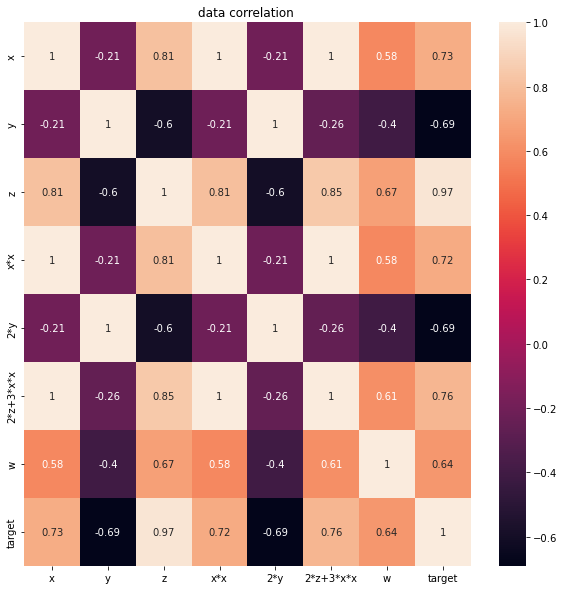

In [30]:
plt.figure(figsize=(10,10))
plt.title('data correlation ')
sns.heatmap(data.corr(),annot=True)

### from above correlation matrix ,Clearly we have collinear features 

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Perturbation Test on Logistic Regression

### Hyperparamater Tuning

In [32]:
distributions = dict(alpha=[1e-05, 0.001, 0.1, 1, 100, 1000],penalty=['l2', 'l1'],loss=['log'])

In [33]:
classifier=SGDClassifier()

In [34]:
clf=GridSearchCV(classifier, distributions,n_jobs=-1)

In [35]:
search = clf.fit(X,Y)
search.best_params_

{'alpha': 1e-05, 'loss': 'log', 'penalty': 'l1'}

In [36]:
classifier=SGDClassifier(loss='log',alpha=1e-05,penalty='l2').fit(X,Y)

In [61]:
print('best model accuracy ',accuracy_score(Y,classifier.predict(X)))

best model accuracy  1.0


In [62]:
weights1=classifier.coef_

### Weights that i got after training logistic regression 

In [63]:
weights1

array([[ 15.01197032, -30.0910642 ,  51.18027933,  11.94656492,
        -30.0910642 ,  16.93112518,   2.34211046]])

### Adding noise to the data 

In [64]:
X_noise=X.copy()

In [65]:
X_noise=X_noise+10**-2

In [66]:
classifier=SGDClassifier(loss='log',alpha=1e-05,penalty='l2').fit(X_noise,Y)

In [67]:
weights2=classifier.coef_

### Weights that i got after training Logistic regression on data+noise dataset

In [68]:
weights2

array([[ 34.3403421 , -27.01104891,  71.1804098 ,  29.63471763,
        -27.01104891,  35.25971146,  25.03145155]])

In [69]:
diff_weights=abs(weights1-weights2)

In [72]:
p_diff_weights=abs((weights1-weights2)/weights1)*100

### Absolute percentage deviation of weights 

In [73]:
p_diff_weights

array([[128.75306425,  10.23564762,  39.07780641, 148.06057499,
         10.23564762, 108.2537993 , 968.75623563]])

In [74]:
print('Top features :')
for i in np.argsort(p_diff_weights[0])[::-1]:
  print(features[i])

Top features :
w
x*x
x
2*z+3*x*x
z
2*y
y


#### Now model told the above features as colinear features, if we rerun the cell again it may say other features because , z and 2*z , 3*x and x are collinear with each other , and 2*z+3*x*x is colinear with z and x

# Observation

### As the difference of their weights are high after and before pertubation test , we can say that we have colinear features in the dataset

# Perturbation Test on SVM

In [75]:
data = pd.read_csv('/home/ubuntu/drive_kodakandlasrikar99/aaic/task_d.csv')

In [76]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [77]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

### Hyperparamater Tuning

In [78]:
distributions = dict(alpha=[1e-05, 0.001, 0.1, 1, 100, 1000],penalty=['l2', 'l1'],loss=['hinge'])

In [79]:
classifier=SGDClassifier()

In [80]:
clf=GridSearchCV(classifier, distributions,n_jobs=-1)

In [81]:
search = clf.fit(X,Y)
search.best_params_

{'alpha': 1e-05, 'loss': 'hinge', 'penalty': 'l2'}

In [82]:
classifier=SGDClassifier(loss='hinge',alpha=1e-05,penalty='l2').fit(X,Y)

In [83]:
print('best model accuracy ',accuracy_score(Y,classifier.predict(X)))

best model accuracy  1.0


In [84]:
weights1=classifier.coef_

### Weights that i got after training SVM

In [85]:
weights1

array([[ 27.24967259, -29.88431733,  53.73569211,  23.45672205,
        -29.88431733,  27.59889366,  28.15885083]])

### Adding noise to the data 

In [86]:
X_noise=X.copy()

In [88]:
X_noise=X_noise+10**-2

In [89]:
classifier=SGDClassifier(loss='hinge',alpha=1e-05,penalty='l2').fit(X_noise,Y)

In [90]:
weights2=classifier.coef_

### Weights that i got after training SVM on data+noise dataset

In [91]:
weights2

array([[ 20.05994552, -32.00111772,  83.48343588,  17.11657262,
        -32.00111772,  25.48103013,  30.04310468]])

In [92]:
diff_weights=abs(weights1-weights2)

In [93]:
p_diff_weights=abs((weights1-weights2)/weights1)

### Absolute percentage deviation of weights 

In [94]:
p_diff_weights

array([[0.26384637, 0.07083315, 0.55359376, 0.27029137, 0.07083315,
        0.07673726, 0.06691515]])

In [95]:
print('Top colinear features')
for i in np.argsort(p_diff_weights[0])[::-1]:
  print(features[i])

Top colinear features
z
x*x
x
2*z+3*x*x
2*y
y
w


### Now model told the above features as colinear features, if we rerun the cell again it may say other features because , z and 2*z , 3*x and x are collinear with each other , and 2*z+3*x*x is colinear with z and x 

# Observation

### As the absolute percentage difference of their weights are high after and before pertubation test , we can say that we have colinear features in the dataset